# Business Case: Netflix - Data Exploration and Visualisation

Business Problem:
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- 'duration' column is having data in 'min' for Movie and 'season' for TV Show

# Descriptive Analysis and Dataset Summary

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset consists of 8,807 entries with 12 attributes:
 - show_id: Unique ID for every Movie / TV show
 - type: Identifier — A Movie or TV Show
 - title: Title of the Movie / TV Show
 - director: Director of the Movie
 - cast: Actors involved in the movie/show
 - country: The country where the movie/show was produced
 - date_added: Date it was added on Netflix
 - release_year: Actual Release year of the movie/show
 - rating: TV Rating of the movie/show
 - duration: Total Duration — in minutes or number of seasons
 - listed_in: Genre
 - description: The summary description

In [5]:
#computing descriptive statistics for dataset
desc = df.describe().T #summary statistics for numerical values
desc_rounded = desc.round(0).astype(int)
desc_rounded

,count,mean,std,min,25%,50%,75%,max
release_year,8807,2014,9,1925,2013,2017,2019,2021


In [6]:
basic_metrics_categorical = df[['type', 'country', 'rating']].describe(include=['object'])
basic_metrics_categorical

,type,country,rating
count,8807,7976,8803
unique,2,748,17
top,Movie,United States,TV-MA
freq,6131,2818,3207


- Standard Deviation is low, meaning data is clustered around mean.
- The average release_year being around 2014, along with a median of 2017, suggests that Netflix has a lot of content from the recent decade.
-  The high frequency of Movies compared to TV Shows indicates a stronger focus on movie content.
- The United States appears to be the most common country for content production.
- The rating “TV-MA” is the most frequent, suggesting a focus on mature audiences.

In [7]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [8]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [9]:
df['country'].value_counts().head()

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [10]:
df['duration'].value_counts().head()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
Name: duration, dtype: int64

In [11]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

- 'show_id','type' and 'title' are unique identifiers.
- There are more Movies than TV Shows.
- Most of the Movie or Tv Shows are produced in USA followed by India and UK
- The most common ratings are ‘TV-MA’ and ‘TV-14’, indicating a focus on mature and teen audiences.
- In 'rating' column, some unique values belong to duration column.(74 min, 84 min, 66 min)

# Missing values and dealing with them

In [12]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


- There are Null values present in 'director', 'cast' , 'country', 'date_added', 'rating' and 'duration'. 
- 'type','rating' and 'released_year' needs to be treated as categorical data.
- There are no duplicated rows in dataset.

In [14]:
#dealing with missing values
df.fillna({'rating':'Unavailable','cast':'Unavailable','country':'Unavailable','director':'Unavailable'},inplace=True)


In [15]:
#converting column to datetime
print(df.columns)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Check for missing values in 'date_added'
print(df['date_added'].isnull().sum())

# Extract year, month, and day of the week
df['year_added'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day_name()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
10


# Visualisations:

In [16]:
type_value_cnts=round(df['type'].value_counts(normalize =True)*100,0)
type_value_cnts


Movie      70.0
TV Show    30.0
Name: type, dtype: float64

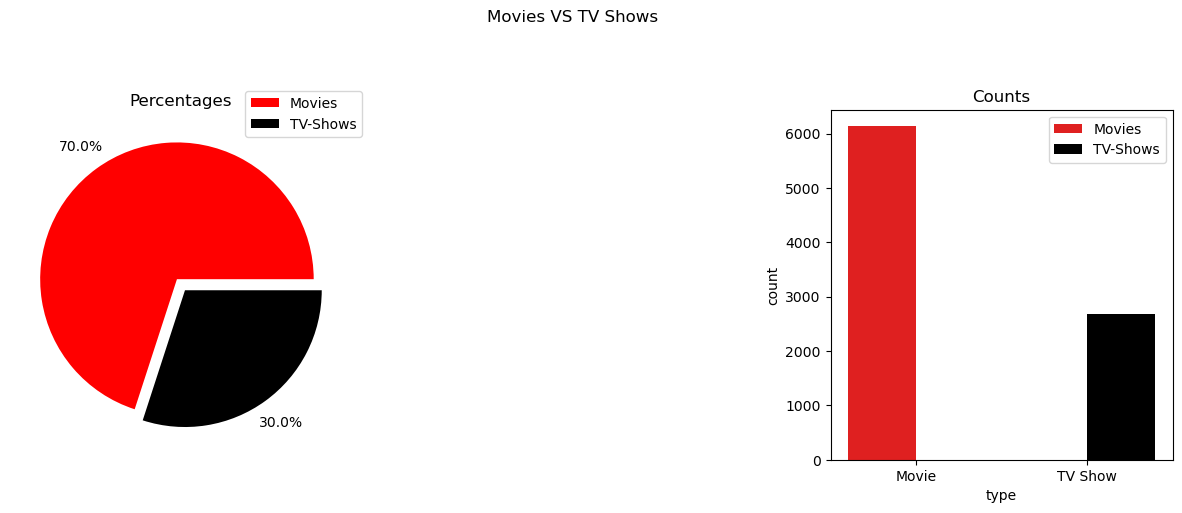

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pie(type_value_cnts,explode=(0.05,0.05),autopct='%1.1f%%', colors=['red','black'],pctdistance=1.2)
plt.legend(['Movies','TV-Shows'],loc="right",bbox_to_anchor=(1.05,1))
plt.title("Percentages")
plt.subplot(2,3,3)

sns.countplot(x="type",data=df,hue='type',palette=['red','black'])
plt.legend(['Movies','TV-Shows'],loc="upper right")
plt.title("Counts")
plt.suptitle("Movies VS TV Shows")
plt.show()

- 70% of the content on Netflix is movies and remaining 30% are TV Shows.
- The count of Movies is significantly higher than that of TV Shows, indicating that Netflix has a more extensive catalog of movies.

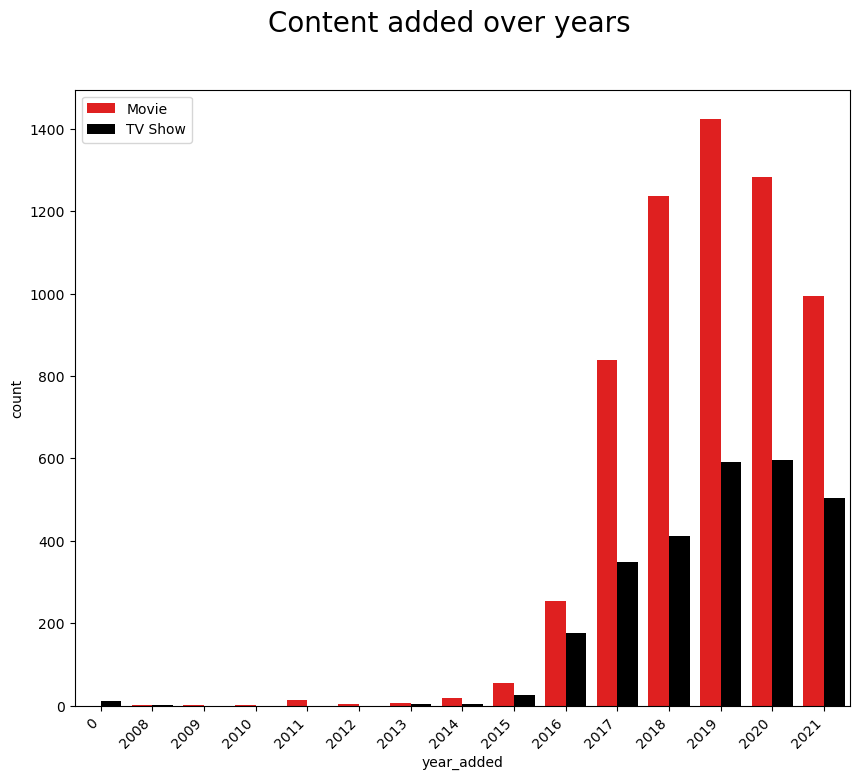

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='year_added', data=df, palette=['red','black'],hue='type')
plt.suptitle('Content added over years',fontsize=20)
plt.xticks(rotation=45,ha='right')
plt.legend(loc='upper left') 
plt.show()

- In 2019, a significant number of contents were added, surpassing the additions in both 2020 and 2018.This indicates a substantial growth in content industry during that year.
- However, in 2021, there was a noticable decline in the number of movies added,which could possibly be attributed to the impact of COVID-19 pnadamic.

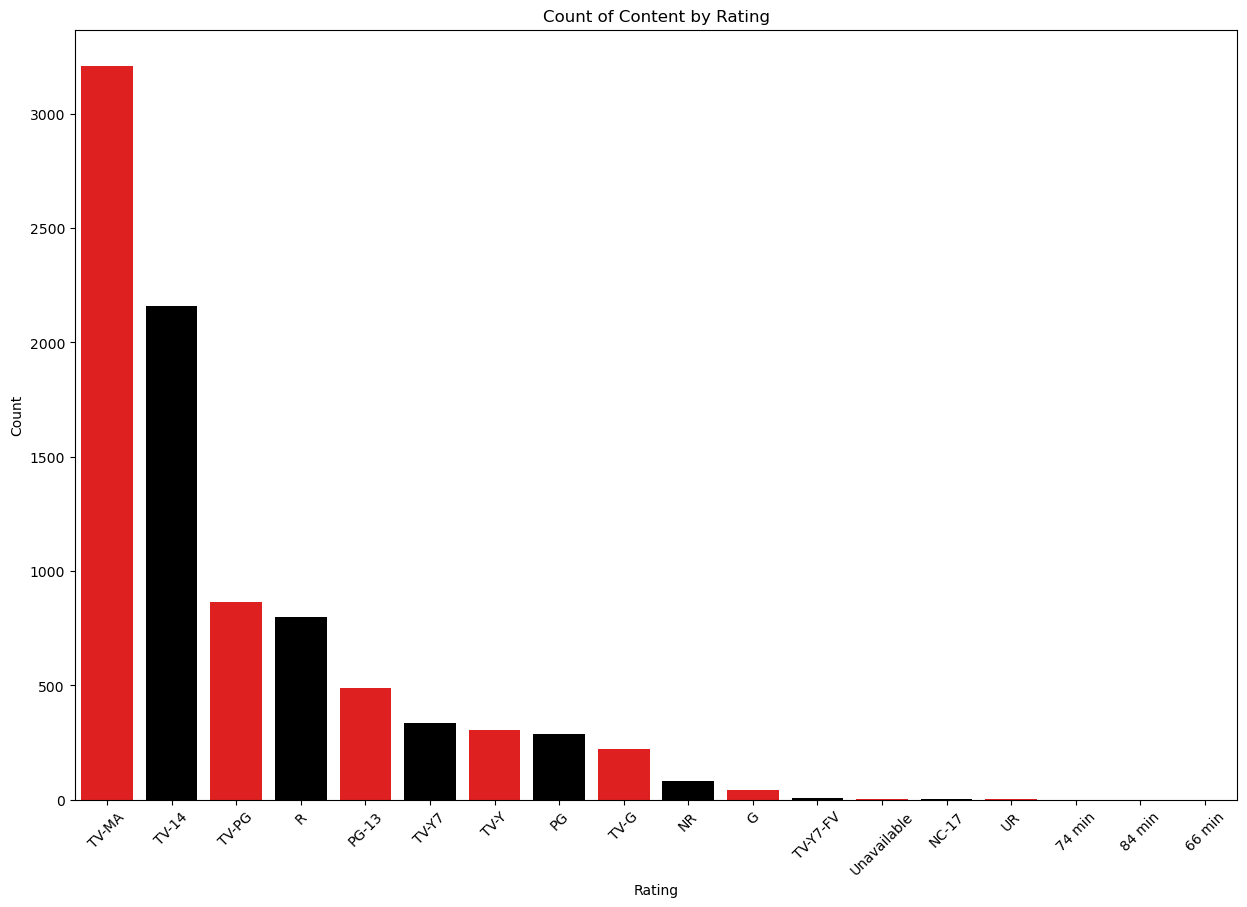

In [19]:
# Countplot for Rating
plt.figure(figsize=(15, 10))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette=['red','black'])
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The majority of the content is rated “TV-MA” followed by “TV-14”, indicating a focus on mature audiences and teenagers.

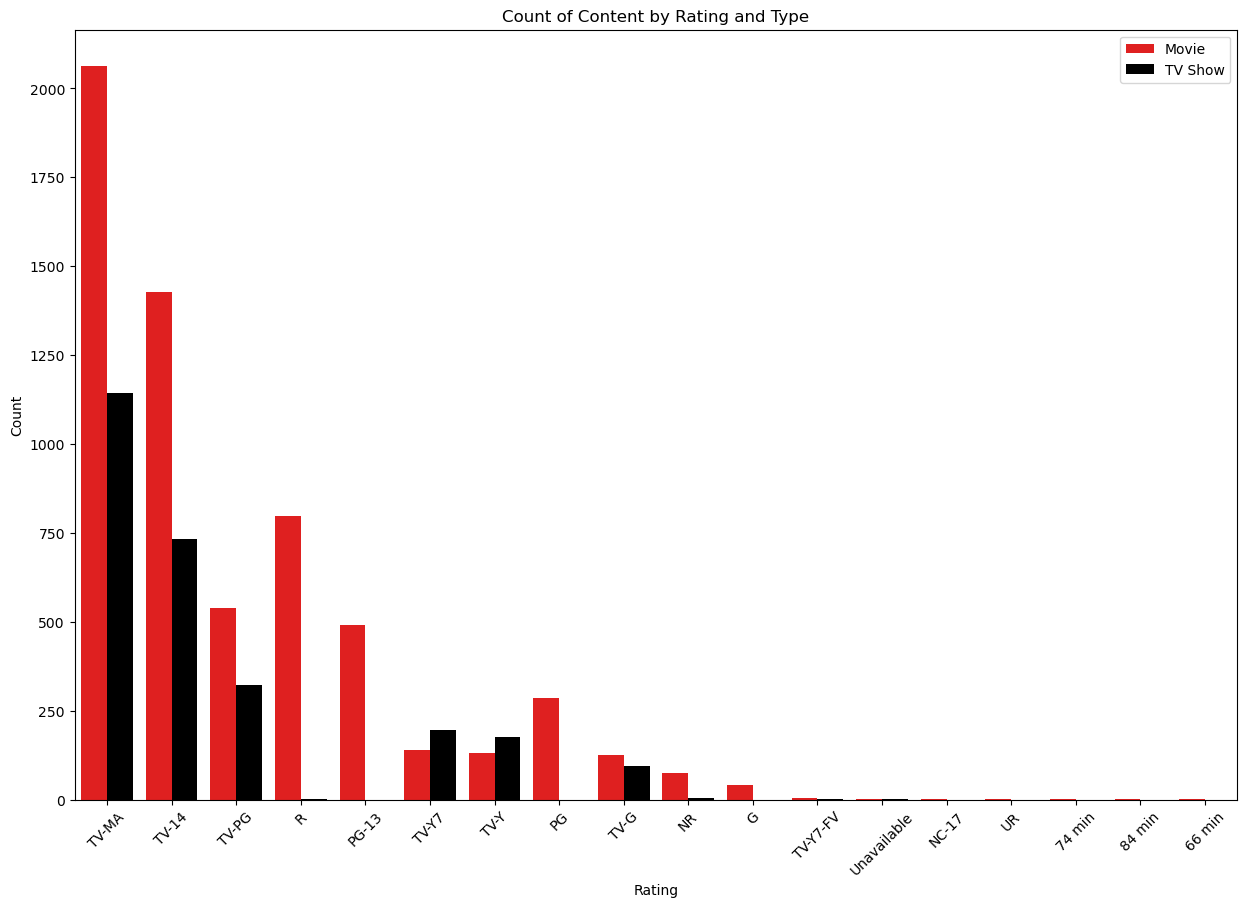

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, hue='type', palette=['red','black'])
plt.title('Count of Content by Rating and Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right') 
plt.show()

- Other than 'TV-Y7' and 'TV-Y' ratings for most of the ratings there are more movies than TV Shows.
- For ratings like 'R','PG-13','PG' and 'G' there are almost no TV Shows.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


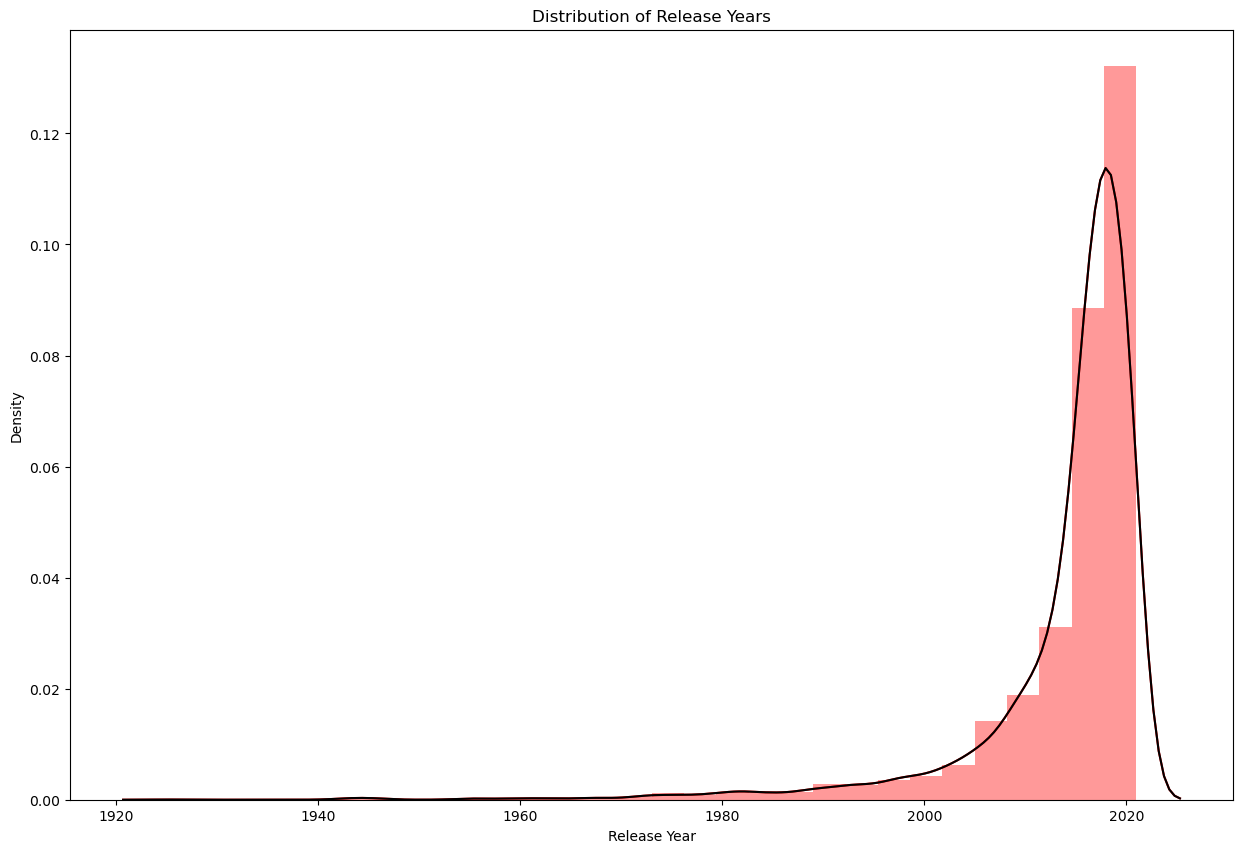

In [21]:
# Distplot for release_year
plt.figure(figsize=(15, 10))
sns.distplot(df['release_year'], bins=30,color='red')
sns.kdeplot(df['release_year'], color='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

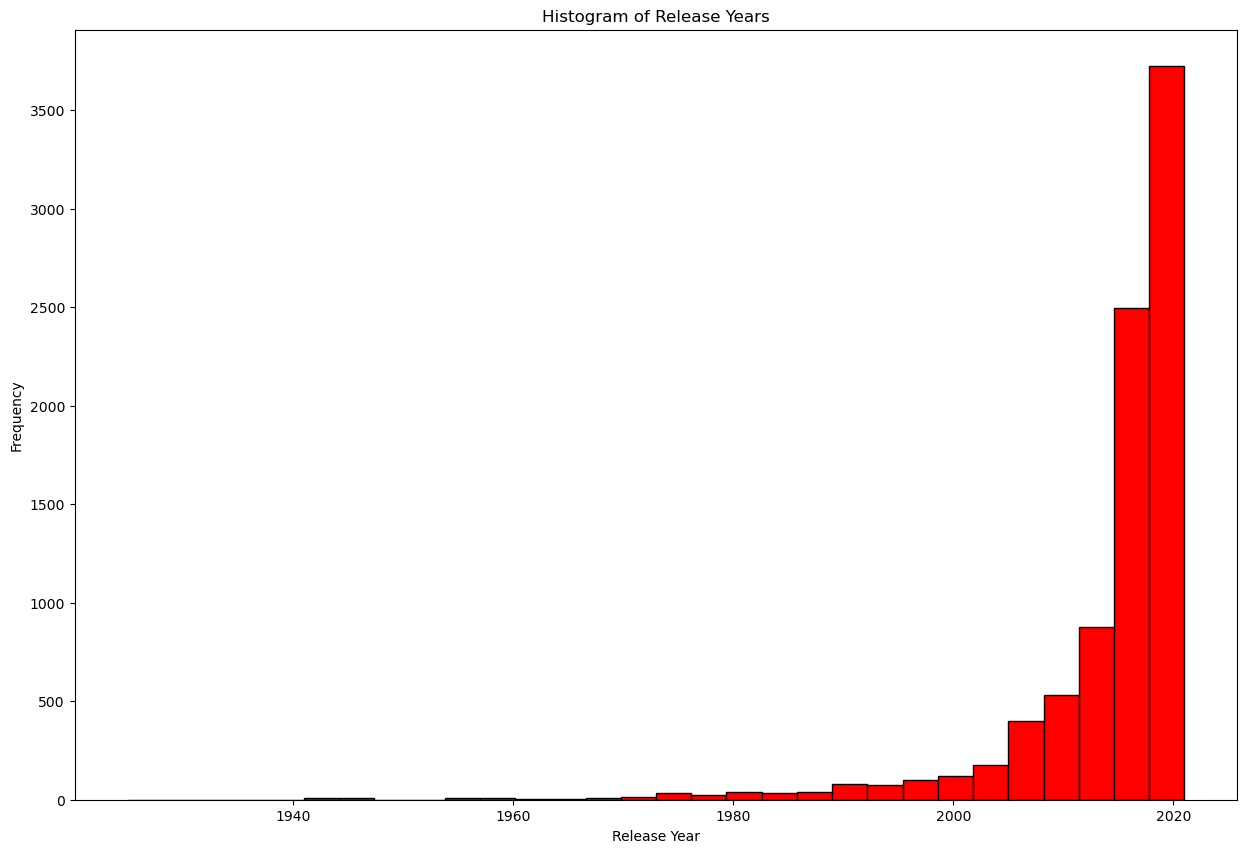

In [22]:
# Histogram for release_year
plt.figure(figsize=(15, 10))
plt.hist(df['release_year'], bins=30, edgecolor='black',color=['red'])
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

-  The distribution of release years is right-skewed, indicating that most of the content on Netflix is relatively new, with a significant amount released in the last decade.

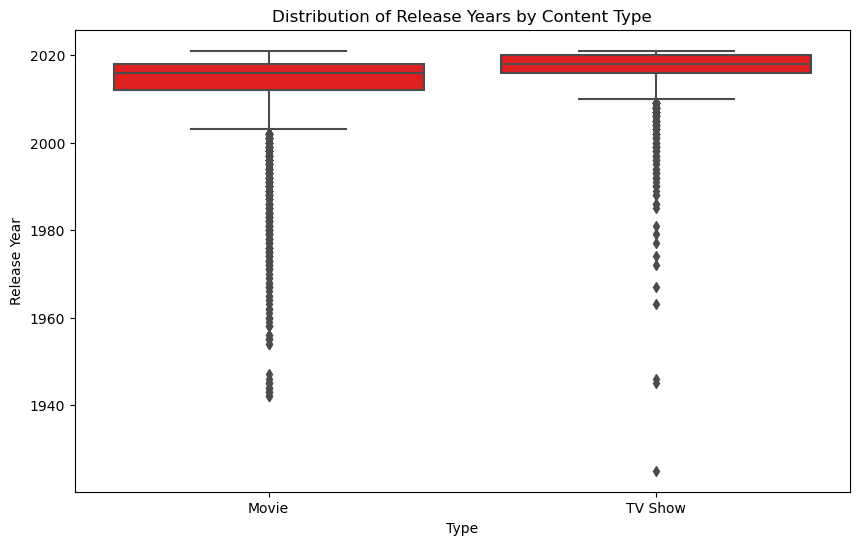

In [23]:
# Boxplot for type vs. release_year
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=df, palette=['red'])
plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

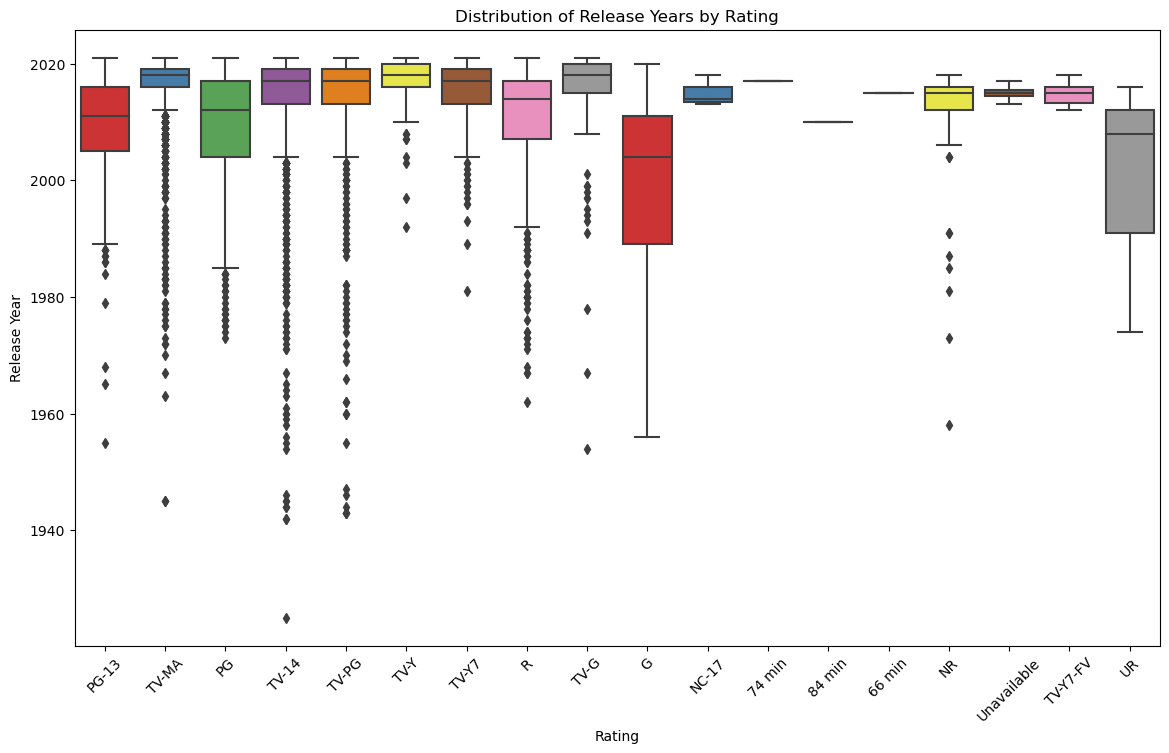

In [24]:
# Boxplot for rating vs. release_year
plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='release_year', data=df, palette='Set1')
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

- The boxplot shows that the median release year for most ratings is relatively recent.
- Content with ratings “TV-Y” and “TV-Y7” tends to be older compared to other ratings.

In [25]:
df['duration'] = df['duration'].astype(str)
df['duration'] = df['duration'].replace('missing', pd.NA)
df['duration'] = df['duration'].replace('nan', pd.NA)
movie_durations = df[(df['type'] == 'Movie') & (df['duration'].notna())]['duration']
movie_durations = movie_durations.str.replace(' min', '').astype(int)

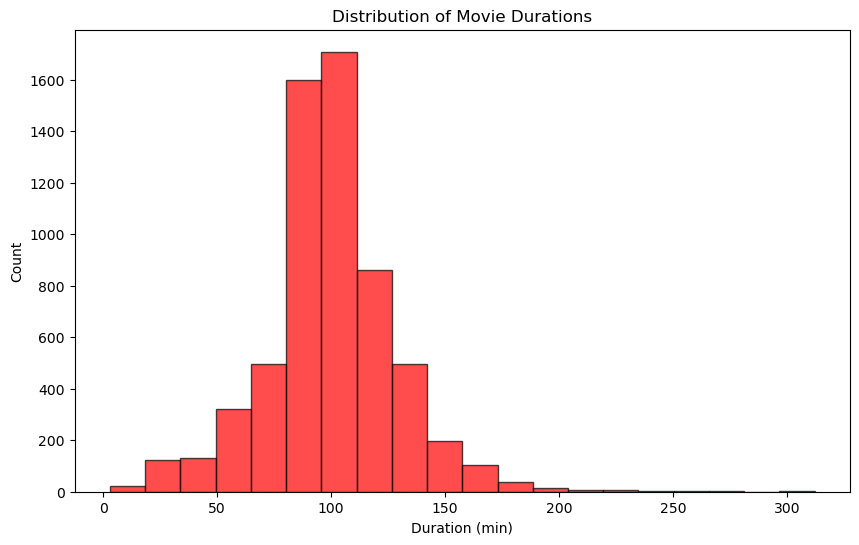

In [26]:
#histogram for duration
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.show()


- The average movie length is around 100 minutes.
- And median is 98 minutes.

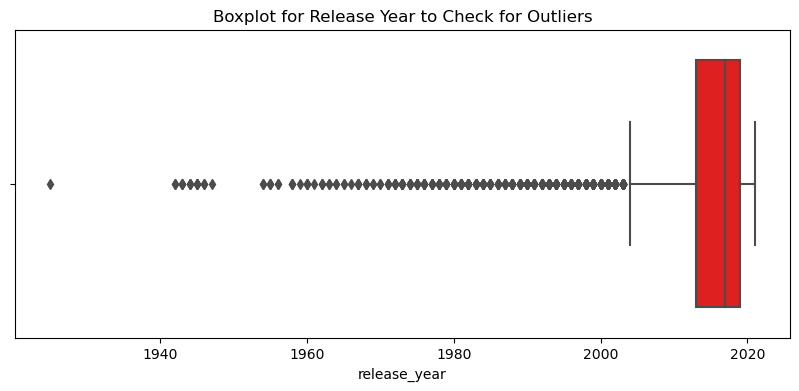

In [27]:
# Boxplot to check for 'release_year'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['release_year'],color='red')
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

- The boxplot for release_year shows no significant outliers, indicating that the data for this attribute is relatively consistent.

In [28]:
country_tb = df[['show_id', 'type', 'country']].copy()
country_tb.dropna(inplace=True)
country_tb['country'] = country_tb['country'].apply(lambda x: x.split(','))
country_tb = country_tb.explode('country')

In [29]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [30]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [31]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [32]:
genre_tb = genre_tb.copy()  
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x: x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

In [33]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

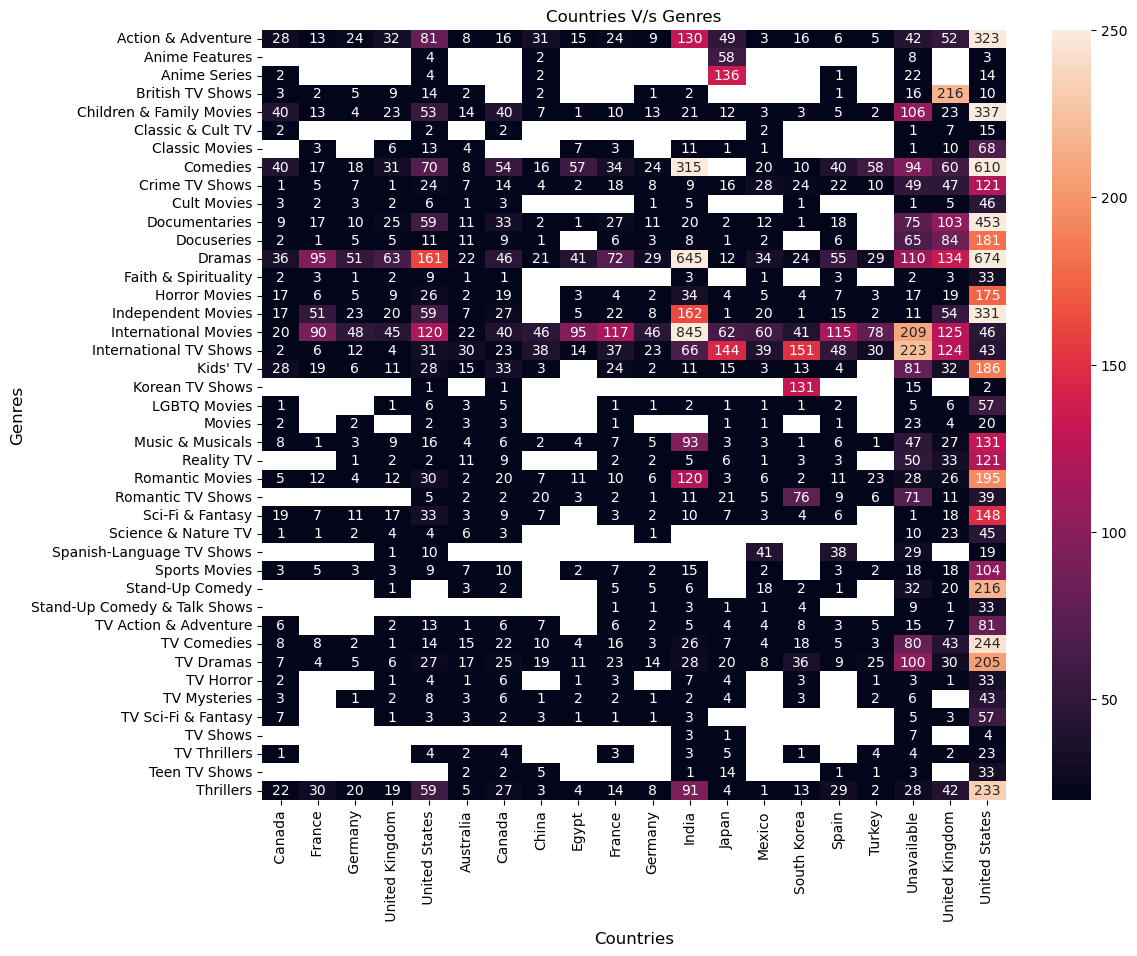

In [34]:
#Heatmap
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

- Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers.
- United States and UK have a good mix of almost all genres.
- Maximum International movies are produced in India.

# Insights based on Non-Graphical and Visual Analysis
- Around 70% content on Netflix is Movies and around 30% content is TV shows. 
- Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of COVID-19 Pandemic.
- Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly.  Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of TV Shows in recent years.
- 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
- 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
- Various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
- Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
- International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
- Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
-  Shorter duration movies have been popular in last 10 years.




# Business Insights:

- In comparison with TV Shows ,Netflix added more movies.
- Netflix offers the most content for Americans compared to other countries.
- The majority of Netflix content is only available to adults.
- International films, Dramas, Comedies, International TV Shows and action and Adventure are currently the most popular subgenre.
- Maximum content (more than 80%) is 
    * **TV-MA** - Content intended for mature audiences aged 17 and above.
    * **TV-14** - Content suitable for viewers aged 14 and above.
    * **TV-PG** - Parental guidance suggested (similar ratings - PG-13 , PG)
    * **R** - Restricted Content, that may not be suitable for viewers under age 17.
- Due to the COVID-19 pandemic there was a decrease in new content in 2021.
- The majority of Netflix subscribers come from the US followed by India and then UK.

# Recommendations:

**TV Shows:**
- Compared to Movies the TV Shows are more recently added and TV Shows are lesser in numbers too. So, Netflix could consider adding more classic TV Shows to its catalog to attract a broader age group, including older adults who may have nostalgia for older series.  
- TV Shows should be between one or two seasons.
- Netflix should add new TV Shows on Fridays.

**Movies:**
- Ideal movie length should be between 90 to 100  minutes.
- Netflix should add more movies in genres like International Movies, Comedies, Dramas, Action and Romantic films, which are the most popular movie genre.


**Overall Recommendation:**

- Most of the ratings, around 61.2%, in Netflix is just 'TV-MA' and 'TV-14' which is mostly mature audiences.Genres like Documentaries and Children Movies are less frequent in the catalog. Netflix could diversify its portfolio by exploring underrepresented genres and ratings to attract a more diverse audience.
- Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
- There is a noticeable spike in the number of TV shows added during December and January, suggesting these are peak months for new releases. Given this seasonal trend, Netflix could focus on releasing highly anticipated new seasons or exclusive content during these months to capitalize on increased viewership.